# Dictionary Creation and calculation of EMI scores

## Reload data

In [7]:
# reload data from main analysis
import datasets
from datasets import load_from_disk

tldr_cleaned_sample = load_from_disk("tldr_cleaned_sample")

FileNotFoundError: Directory tldr_cleaned_sample not found

In [5]:
tldr_cleaned_sample

NameError: name 'tldr_cleaned_sample' is not defined

In [3]:
len(tldr_cleaned_sample)

615392

## Create own Dictionary

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Dictionary work

### analysis of original dictionary

In [2]:
# evidence and inutition word list from 'Computational analysis of US congressional speeches reveals a shift from evidence to intuition'
evidence_list = [
    "accurate", "exact", "intelligence", "precise", "search", "analyse", "examination",
    "investigate", "procedure", "show", "analysis", "examine", "investigation", "process",
    "statistics", "correct", "expert", "knowledge", "proof", "study", "correction", "explore",
    "lab", "question", "trial", "data", "fact", "learn", "read", "real", "dossier", "find",
    "logic", "reason", "true", "education", "findings", "logical", "research", "truth",
    "evidence", "information", "method", "science", "truthful", "evident", "inquiry",
    "pinpoint", "scientific"
]

intuition_list = [
    "advice", "doubt", "mislead", "suggestion", "belief", "fake", "mistaken", "suspicion",
    "believe", "fake news", "mistrust", "view", "bogus", "feeling", "opinion", "viewpoint",
    "common sense", "genuine", "perspective", "wrong", "deceive", "guess", "phony",
    "deception", "gut", "point of view", "dishonest", "instinct", "propaganda", "dishonesty",
    "intuition", "sense", "distrust", "lie", "suggest"
]


In [6]:
from collections import Counter

# Jede Liste in der Spalte 'clean' in einen String umwandeln
flattened_clean = [' '.join(post) for post in tldr_cleaned_sample['clean']]

# Dann alle Posts zu einem großen Text zusammenfügen
all_text = ' '.join(flattened_clean)

# Counter über alle Wörter
word_counter = Counter(all_text.split())

# Nur Wörter aus intuition_list zählen
og_intuition_dict = {word: word_counter[word] for word in intuition_list}


In [7]:
og_intuition_sorted = sorted(og_intuition_dict.items(), key=lambda x: x[1], reverse=True)

In [3]:
new_colors = plt.get_cmap('tab20c')
blue = new_colors(0)
orange = new_colors(4)

blue = new_colors(2)

In [4]:
# Unpack into two lists
int_words, int_counts = zip(*og_intuition_sorted)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(int_words, int_counts, color=blue)
plt.xticks(rotation=45, ha='right')
plt.title("Word Frequencies of the 'Original' Intuition Keywords")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

NameError: name 'og_intuition_sorted' is not defined

In [9]:
# Nur Wörter aus evidence_list zählen
og_evidence_dict = {word: word_counter[word] for word in evidence_list}


In [10]:
og_evidence_sorted = sorted(og_evidence_dict.items(), key=lambda x: x[1], reverse=True)

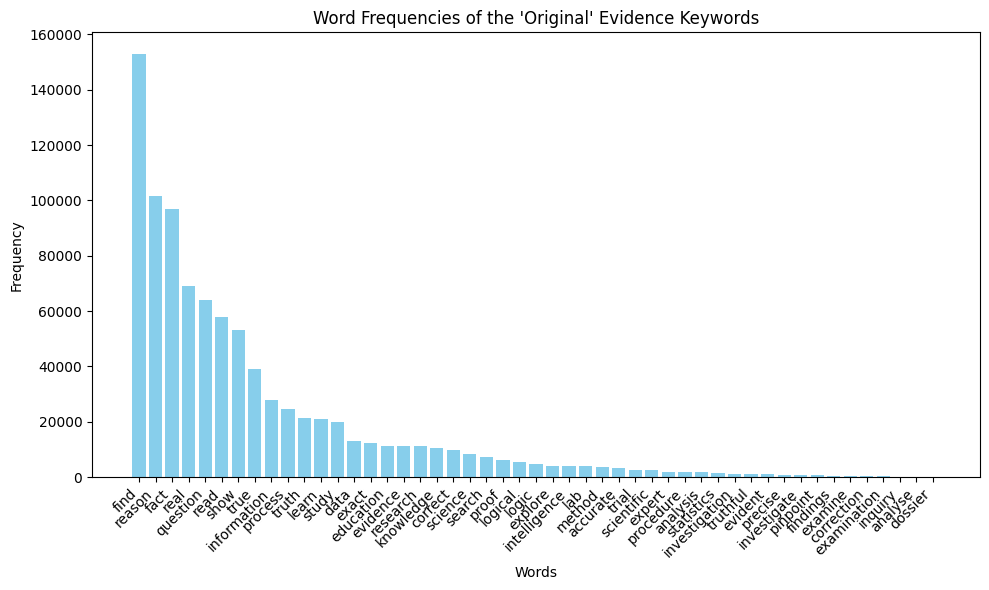

In [11]:
evi_words, evi_counts = zip(*og_evidence_sorted)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(evi_words, evi_counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Word Frequencies of the 'Original' Evidence Keywords")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [12]:
og_evidence_sorted

[('find', 153056),
 ('reason', 101584),
 ('fact', 96884),
 ('real', 69135),
 ('question', 64178),
 ('read', 57752),
 ('show', 53281),
 ('true', 39242),
 ('information', 27774),
 ('process', 24649),
 ('truth', 21291),
 ('learn', 20881),
 ('study', 19902),
 ('data', 12905),
 ('exact', 12172),
 ('education', 11369),
 ('evidence', 11291),
 ('research', 11138),
 ('knowledge', 10471),
 ('correct', 9890),
 ('science', 8407),
 ('search', 7361),
 ('proof', 6147),
 ('logical', 5523),
 ('logic', 4807),
 ('explore', 4220),
 ('intelligence', 3964),
 ('lab', 3888),
 ('method', 3772),
 ('accurate', 3329),
 ('trial', 2601),
 ('scientific', 2584),
 ('expert', 1861),
 ('procedure', 1850),
 ('analysis', 1779),
 ('statistics', 1565),
 ('investigation', 1279),
 ('truthful', 1032),
 ('evident', 995),
 ('precise', 863),
 ('investigate', 807),
 ('pinpoint', 677),
 ('findings', 556),
 ('examine', 544),
 ('correction', 331),
 ('examination', 309),
 ('inquiry', 240),
 ('analyse', 208),
 ('dossier', 16)]

In [13]:
og_evidence_filtered = [(word) for word, freq in og_evidence_sorted if freq > 1000]


In [14]:
og_evidence_filtered

['find',
 'reason',
 'fact',
 'real',
 'question',
 'read',
 'show',
 'true',
 'information',
 'process',
 'truth',
 'learn',
 'study',
 'data',
 'exact',
 'education',
 'evidence',
 'research',
 'knowledge',
 'correct',
 'science',
 'search',
 'proof',
 'logical',
 'logic',
 'explore',
 'intelligence',
 'lab',
 'method',
 'accurate',
 'trial',
 'scientific',
 'expert',
 'procedure',
 'analysis',
 'statistics',
 'investigation',
 'truthful']

In [15]:
# used: those w count >1000
# eliminated:
    # find: "I find it to be..."
    # true - too ambiguous
og_evidence_filtered.remove('find')
og_evidence_filtered.remove('true')
# added:
    # article
    # argument
og_evidence_filtered.append('article')
og_evidence_filtered.append('argument')

In [16]:
og_intuition_filtered = [(word) for word, freq in og_intuition_sorted if freq > 1000]

In [17]:
og_intuition_filtered

['feeling',
 'wrong',
 'advice',
 'believe',
 'guess',
 'sense',
 'lie',
 'opinion',
 'doubt',
 'perspective',
 'view',
 'suggest',
 'fake',
 'genuine',
 'gut',
 'belief',
 'suggestion',
 'suspicion',
 'instinct',
 'dishonest',
 'propaganda',
 'distrust',
 'mistaken']

In [18]:
og_intuition_filtered.remove('wrong')

### create own dictionary

#### start from original dictionary for initial keywords

In [19]:
own_evidence_seeds = og_evidence_filtered

own_intuition_seeds = og_intuition_filtered

#### create fasttext embeddings

In [20]:
%pip install fasttext-wheel
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [21]:
# fastText library
# Using the fastText embeddings, we expanded the seed words to include words that have a cosine similarity score above 0.75.
import fasttext
import fasttext.util
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [22]:
# Load pre-trained fastText word vectors (e.g., English)
fasttext.util.download_model('en', if_exists='ignore')  # en for English
ft_model = fasttext.load_model('cc.en.300.bin')

# Convert to Gensim KeyedVectors interface for easy similarity search
kv_model = KeyedVectors(vector_size=300)
kv_model.add_vectors(
    list(ft_model.words),
    np.vstack([ft_model.get_word_vector(w) for w in ft_model.words])
)

In [23]:
# Function to get similar words with a cosine threshold
def expand_keywords(keywords, model, threshold=0.75, topn=10000):
    expanded = {}
    for word in keywords:
        if word not in model:
            continue
        similar = model.similar_by_vector(model[word], topn=topn)
        filtered = [(w, sim) for w, sim in similar if sim >= threshold]
        expanded[word] = filtered
    return expanded

In [24]:
# Run expansion
evidence_expand_result = expand_keywords(own_evidence_seeds, kv_model)

# Print
evidence_expand_set = set()
for kw, sims in evidence_expand_result.items():
    print(f"\nKeyword: {kw}")
    for w, score in sims:
        evidence_expand_set.add(w)
        print(f"  {w} ({score:.2f})")


Keyword: reason
  reason (1.00)
  reasons (0.77)

Keyword: fact
  fact (1.00)

Keyword: real
  real (1.00)

Keyword: question
  question (1.00)
  answer (0.79)
  quesiton (0.79)
  quesion (0.79)
  questions (0.76)
  question- (0.75)

Keyword: read
  read (1.00)
  re-read (0.78)
  reread (0.75)

Keyword: show
  show (1.00)
  shows (0.77)

Keyword: information
  information (1.00)

Keyword: process
  process (1.00)

Keyword: truth
  truth (1.00)
  truth.But (0.78)
  truths (0.76)

Keyword: learn
  learn (1.00)

Keyword: study
  study (1.00)

Keyword: data
  data (1.00)

Keyword: exact
  exact (1.00)

Keyword: education
  education (1.00)
  educaiton (0.77)
  eduation (0.76)
  eduction (0.75)

Keyword: evidence
  evidence (1.00)
  evidences (0.79)

Keyword: research
  research (1.00)
  reseach (0.80)
  reserach (0.76)

Keyword: knowledge
  knowledge (1.00)
  knowlege (0.81)
  knowldege (0.76)
  knoweldge (0.75)

Keyword: correct
  correct (1.00)
  corrrect (0.79)
  incorrect (0.77)

Keyw

In [25]:
# Run expansion
intuition_expand_result = expand_keywords(own_intuition_seeds, kv_model)

# Print
intuition_expand_set = set()
for kw, sims in intuition_expand_result.items():
    print(f"\nKeyword: {kw}")
    for w, score in sims:
        intuition_expand_set.add(w)
        print(f"  {w} ({score:.2f})")



Keyword: feeling
  feeling (1.00)

Keyword: advice
  advice (1.00)

Keyword: believe
  believe (1.00)

Keyword: guess
  guess (1.00)
  suppose (0.83)
  dunno (0.77)
  think (0.76)

Keyword: sense
  sense (1.00)

Keyword: lie
  lie (1.00)

Keyword: opinion
  opinion (1.00)
  opinon (0.84)
  opionion (0.80)
  opnion (0.79)
  opinions (0.75)

Keyword: doubt
  doubt (1.00)

Keyword: perspective
  perspective (1.00)
  persepctive (0.78)
  viewpoint (0.77)
  perpective (0.77)
  persepective (0.76)

Keyword: view
  view (1.00)

Keyword: suggest
  suggest (1.00)

Keyword: fake
  fake (1.00)
  phony (0.77)

Keyword: genuine
  genuine (1.00)
  geniune (0.82)

Keyword: gut
  gut (1.00)

Keyword: belief
  belief (1.00)

Keyword: suggestion
  suggestion (1.00)

Keyword: suspicion
  suspicion (1.00)

Keyword: instinct
  instinct (1.00)
  instincts (0.85)
  instict (0.80)
  instinctual (0.79)
  instinctive (0.77)

Keyword: dishonest
  dishonest (1.00)
  deceitful (0.78)
  untruthful (0.76)

Keyword:

#### clean expanded sets

In [26]:
evidence_expand_set

{'accurate',
 'acurate',
 'agrument',
 'analyis',
 'analyses',
 'analysis',
 'anaylsis',
 'answer',
 'arguement',
 'argument',
 'argument.The',
 'argument.This',
 'arguments',
 'aricle',
 'artice',
 'article',
 'arugment',
 'aticle',
 'correct',
 'corrrect',
 'counter-argument',
 'data',
 'eduation',
 'educaiton',
 'education',
 'eduction',
 'evidence',
 'evidences',
 'exact',
 'expert',
 'experts',
 'explore',
 'exploring',
 'fact',
 'honest',
 'incorrect',
 'information',
 'inteligence',
 'intelligence',
 'intelligence.The',
 'investigation',
 'investigation.The',
 'investigations',
 'knoweldge',
 'knowldege',
 'knowledge',
 'knowlege',
 'lab',
 'lab.',
 'laboratory',
 'labs',
 'learn',
 'logic',
 'logical',
 'method',
 'methods',
 'procedure',
 'procedure.The',
 'procedure.This',
 'procedures',
 'proceedure',
 'process',
 'proof',
 'quesion',
 'quesiton',
 'question',
 'question-',
 'questions',
 're-read',
 'read',
 'real',
 'reason',
 'reasons',
 'reread',
 'reseach',
 'research',

In [27]:
evidence_expand_set_clean = {
 'accurate',
 #'acurate',
 #'agrument',
 #'analyis',
 #'analyses',
 'analysis',
 #'anaylsis',
 'answer',
 #'arguement',
 'argument',
 #'argument.The',
 #'argument.This',
 #'arguments',
 #'aricle',
 #'artice',
 'article',
 #'arugment',
 #'aticle',
 'correct',
 #'corrrect',
 'counter-argument',
 'data',
 #'eduation',
 #'educaiton',
 'education',
 #'eduction',
 'evidence',
 #'evidences',
 'exact',
 'expert',
 #'experts',
 'explore',
 #'exploring',
 'fact',
 'honest',
 'incorrect',
 'information',
 #'inteligence',
 'intelligence',
 #'intelligence.The',
 'investigation',
 #'investigation.The',
 #'investigations',
 #'knoweldge',
 #'knowldege',
 'knowledge',
 #'knowlege',
 'lab',
 #'lab.',
 #'laboratory',
 #'labs',
 'learn',
 'logic',
 #'logical',
 'method',
 #'methods',
 'procedure',
 #'procedure.The',
 #'procedure.This',
 #'procedures',
 #'proceedure',
 'process',
 'proof',
 #'quesion',
 #'quesiton',
 'question',
 #'question-',
 #'questions',
 #'re-read',
 'read',
 'real',
 'reason',
 #'reasons',
 #'reread',
 #'reseach',
 'research',
 #'reserach',
 'science',
 #'sciene',
 #'scientifc',
 'scientific',
 #'seach',
 'search',
 'show',
 #'shows',
 'statistics',
 'study',
 'trial',
 #'trials',
 'truth',
 #'truth.But',
 #'truthful',
 #'truths'
 }

In [28]:
intuition_expand_set

{'advice',
 'agitprop',
 'belief',
 'believe',
 'counter-propaganda',
 'deceitful',
 'dishonest',
 'disinformation',
 'distrust',
 'doubt',
 'dunno',
 'fake',
 'feeling',
 'geniune',
 'genuine',
 'guess',
 'gut',
 'instict',
 'instinct',
 'instinctive',
 'instincts',
 'instinctual',
 'lie',
 'mistaken',
 'mistrust',
 'opinion',
 'opinions',
 'opinon',
 'opionion',
 'opnion',
 'perpective',
 'persepctive',
 'persepective',
 'perspective',
 'phony',
 'propaganda',
 'propaganda.The',
 'propagandist',
 'propagandistic',
 'propganda',
 'propoganda',
 'sense',
 'suggest',
 'suggestion',
 'suppose',
 'suspicion',
 'think',
 'untruthful',
 'view',
 'viewpoint'}

In [29]:
# remove misspellings
intuition_expand_set_clean = {
 'advice',
 #'agitprop',
 #'belief',
 'believe',
 #'counter-propaganda',
 'deceitful',
 'dishonest',
 'disinformation',
 'distrust',
 'doubt',
 'dunno',
 'fake',
 'feeling',
 #'geniune',
 'genuine',
 'guess',
 'gut',
 #'instict',
 'instinct',
 #'instinctive',
 #'instincts',
 #'instinctual',
 'lie',
 'mistaken',
 'mistrust',
 'opinion',
 #'opinions',
 #'opinon',
 #'opionion',
 #'opnion',
 #'perpective',
 #'persepctive',
 #'persepective',
 'perspective',
 'phony',
 'propaganda',
 #'propaganda.The',
 #'propagandist',
 #'propagandistic',
 #'propganda',
 #'propoganda',
 'sense',
 'suggest',
 #'suggestion',
 'suppose',
 'suspicion',
 'think',
 'untruthful',
 'view',
 'viewpoint'}


#### combine seed keywords with expansion

In [30]:
evidence_merge_list = list(set(own_evidence_seeds + list(evidence_expand_set_clean)))
evidence_merge_list.sort()
evidence_merge_list

['accurate',
 'analysis',
 'answer',
 'argument',
 'article',
 'correct',
 'counter-argument',
 'data',
 'education',
 'evidence',
 'exact',
 'expert',
 'explore',
 'fact',
 'honest',
 'incorrect',
 'information',
 'intelligence',
 'investigation',
 'knowledge',
 'lab',
 'learn',
 'logic',
 'logical',
 'method',
 'procedure',
 'process',
 'proof',
 'question',
 'read',
 'real',
 'reason',
 'research',
 'science',
 'scientific',
 'search',
 'show',
 'statistics',
 'study',
 'trial',
 'truth',
 'truthful']

In [31]:
# combine original and expanded
intuition_merge_list = list(set(own_intuition_seeds +list(intuition_expand_set_clean)))
intuition_merge_list.sort()
intuition_merge_list

['advice',
 'belief',
 'believe',
 'deceitful',
 'dishonest',
 'disinformation',
 'distrust',
 'doubt',
 'dunno',
 'fake',
 'feeling',
 'genuine',
 'guess',
 'gut',
 'instinct',
 'lie',
 'mistaken',
 'mistrust',
 'opinion',
 'perspective',
 'phony',
 'propaganda',
 'sense',
 'suggest',
 'suggestion',
 'suppose',
 'suspicion',
 'think',
 'untruthful',
 'view',
 'viewpoint']

#### Colexification

In [32]:
# shortcut: use the web interface on https://clics.clld.org/parameters to get subgraphs for each concept and note neighbors
evidence_colexifications = {
    'accurate': None,
    'analysis': None,
    'answer': ['obey','give back', 'come back', 'pay', 'ask', 'speak', 'call by name', 'say', 'tell', 'admit'],
    'argument': None,
    'article': None,
    'correct': ['smooth','straight','flat','yes','good','healthy','beautiful','right','good','truth','clear','certain','holy','true','faithful'],
    'counter-argument': None,
    'data': None,
    'education': None,
    'evidence': None,
    'exact': None,
    'expert':None,
    'explore':None,
    'fact': None,
    'honest':None,
    'incorrect': None,
    'information': None,
    'intelligence':None,
    'investigation':None,
    'knowledge': None,
    'lab':None,
    'learn': ['teach', 'show', 'study', 'read', 'imitate', 'know', 'understand'],
    'logic':None,
    'logical':None,
    'method': None,
    'procedure':None,
    'process': None,
    'proof':None,
    'question': None,
    'read': ['teach','study','look','call','sing','say', 'count', 'calculate', 'weigh', 'learn'],
    'real': None,
    'reason': None,
    'research': None,
    'science': None,
    'scientific':None,
    'search': None,
    'show': ['announce','explain','visible', 'seem', 'teach', 'learn'],
    'statistics':None,
    'study': ['teach', 'learn','read','imitate', 'know', 'understand'],
    'trial':None,
    'truth': ['true','correct'],
    'truthful':None,
}

In [33]:
# shortcut: use the web interface on https://clics.clld.org/parameters to get subgraphs for each concept and note neighbors
intuition_colexifications = {
    'advice': None,
    'belief':None,
    'believe': ['anxiety', 'suspect', 'conceive', 'guess', 'feel', 'know', 'see', 'seem', 'say', 'count', 'want', 'remember', 'think', 'idea'],
    #'deceitful',
    'deceit':['betray','perjury','wrong','lie'],
    'dishonest':None,
    'disinformation':None,
    'distrust':None,
    'doubt': ['suspect'],
    'dunno': None,
    'fake': None,
    'feeling': None,
    'genuine':None,
    'guess': ['feel', 'remember', 'think', 'seem', 'suspect', 'adjudicate', 'measure', 'know'],
    'gut':['belly'],
    'instinct':None,
    'lie': ['mislead', 'deceit', 'perjury', 'sleep'],
    'mistaken':None,
    'mistrust':None,
    'opinion': None,
    'perspective': None,
    'phony': None,
    'propaganda':None,
    'sense': None,
    'suggest': None,
    'suggestion':None,
    'suppose': None,
    'suspicion':None,
    'think': ['seem', 'suspect', 'want', 'idea', 'thought', 'mind', 'conceive', 'remember', 'count', 'know', 'see', 'believe', 'seem', 'guess'],
    'untruthful':None,
    'view': None,
    'viewpoint': None}

#### Combine and reduce colexifications

In [34]:
evidence_set = set()
for key,value in evidence_colexifications.items():
    if value != None:
       value.append(key)
       evidence_set = evidence_set.union(set(value))
    else: 
        evidence_set = evidence_set.union(set({key}))

In [35]:
len(evidence_set)

79

In [36]:
intuition_set = set()
for key,value in intuition_colexifications.items():
    if value != None:
       value.append(key)
       intuition_set = intuition_set.union(set(value))
    else: 
        intuition_set = intuition_set.union(set({key}))

In [37]:
len(intuition_set)

53

In [38]:
# remove intersection
intersection_set = evidence_set.intersection(intuition_set)
evidence_set = evidence_set - intersection_set
intuition_set = intuition_set - intersection_set

In [39]:
evidence_set

{'accurate',
 'admit',
 'analysis',
 'announce',
 'answer',
 'argument',
 'article',
 'ask',
 'beautiful',
 'calculate',
 'call',
 'call by name',
 'certain',
 'clear',
 'come back',
 'correct',
 'counter-argument',
 'data',
 'education',
 'evidence',
 'exact',
 'expert',
 'explain',
 'explore',
 'fact',
 'faithful',
 'flat',
 'give back',
 'good',
 'healthy',
 'holy',
 'honest',
 'imitate',
 'incorrect',
 'information',
 'intelligence',
 'investigation',
 'knowledge',
 'lab',
 'learn',
 'logic',
 'logical',
 'look',
 'method',
 'obey',
 'pay',
 'procedure',
 'process',
 'proof',
 'question',
 'read',
 'real',
 'reason',
 'research',
 'right',
 'science',
 'scientific',
 'search',
 'show',
 'sing',
 'smooth',
 'speak',
 'statistics',
 'straight',
 'study',
 'teach',
 'tell',
 'trial',
 'true',
 'truth',
 'truthful',
 'understand',
 'visible',
 'weigh',
 'yes'}

In [40]:
evidence_set_final = {
'accurate',
 'admit',
 'analysis',
 'announce',
 #'answer',
 'argument',
 'article',
 #'ask',
 #'beautiful',
 'calculate',
 #'call',
 #'call by name',
 'certain',
 'clear',
 #'come back',
 'correct',
 'counter-argument',
 'data',
 'education',
 'evidence',
 'exact',
 'expert',
 'explain',
 'explore',
 'fact',
 #'faithful',
 #'flat',
 #'give back',
 #'good',
 #'healthy',
 #'holy',
 #'honest',
 #'imitate',
 'incorrect',
 'information',
 'intelligence',
 'investigation',
 'knowledge',
 'lab',
 'learn',
 'logic',
 'logical',
 #'look',
 'method',
 #'obey',
 #'pay',
 'procedure',
 'process',
 'proof',
 'question',
 'read',
 'real',
 'reason',
 'research',
 #'right',
 'science',
 'scientific',
 #'search',
 #'show',
 #'sing',
 #'smooth',
 #'speak',
 'statistics',
 #'straight',
 'study',
 #'teach',
 #'tell',
 #'trial',
 'true',
 'truth',
 'truthful',
 'understand',
 #'visible',
 #'weigh',
 #'yes'
 }


In [41]:
len(evidence_set_final)

45

In [42]:
intuition_set

{'adjudicate',
 'advice',
 'anxiety',
 'belief',
 'believe',
 'belly',
 'betray',
 'conceive',
 'deceit',
 'dishonest',
 'disinformation',
 'distrust',
 'doubt',
 'dunno',
 'fake',
 'feel',
 'feeling',
 'genuine',
 'guess',
 'gut',
 'idea',
 'instinct',
 'lie',
 'measure',
 'mind',
 'mislead',
 'mistaken',
 'mistrust',
 'opinion',
 'perjury',
 'perspective',
 'phony',
 'propaganda',
 'remember',
 'see',
 'sense',
 'sleep',
 'suggest',
 'suggestion',
 'suppose',
 'suspect',
 'suspicion',
 'think',
 'thought',
 'untruthful',
 'view',
 'viewpoint',
 'want',
 'wrong'}

In [43]:
intuition_set_final ={
 #'adjudicate',
 'advice',
 #'anxiety',
 #'belief',
 'believe',
 #'belly',
 #'betray',
 'conceive',
 #'deceit',
 #'dishonest',
 #'disinformation',
 #'distrust',
 'doubt',
 'dunno',
 'fake',
 'feel',
 'feeling',
 'genuine',
 'guess',
 'gut',
 'idea',
 'instinct',
 #'lie',
 #'measure',
 'mind',
 #'mislead',
 #'mistaken',
 #'mistrust',
 'opinion',
 #'perjury',
 'perspective',
 #'phony',
 #'propaganda',
 'remember',
 #'see',
 #'sense',
 #'sleep',
 'suggest',
 'suggestion',
 'suppose',
 'suspect',
 'suspicion',
 'think',
 'thought',
 #'untruthful',
 'view',
 'viewpoint',
 #'want',
 #'wrong'
 }

In [44]:
len(intuition_set_final)

26

In [55]:
import pickle

# Save evidence set
with open("evidence_set_final.pkl", "wb") as f:
    pickle.dump(evidence_set_final, f)

# Save intuition set
with open("intuition_set_final.pkl", "wb") as g:
    pickle.dump(intuition_set_final, g)

## Train word2vec for EMI with new dictionary

In [45]:
# train word2vec on samples 
from gensim.models import Word2Vec

# get clean samples and train word2vec
sentences = tldr_cleaned_sample['clean'] 
sentences.append(list(evidence_set_final))
sentences.append(list(intuition_set_final)) 
model = Word2Vec(sentences=sentences, vector_size=300, window=5, min_count=1, workers=4)


In [46]:
model.save("word2vec_tldr_dict.model")

### Compute evidence and inutition cosine similarity

In [47]:
# average the vectors per post to calculate similarity to evidence and intuition vectors
def get_avg_vectors(tokens, model):
    
    # Filter tokens that are in the model's vocabulary
    valid_tokens = [token for token in tokens if token in model.wv]
    
    if not valid_tokens:
        return [], [np.zeros(model.vector_size)* len(tokens)] ,np.zeros(model.vector_size)  # Return a zero vector if no valid tokens
    
    # Get vectors for the valid tokens
    word_vectors = np.array([model.wv[token] for token in valid_tokens])
    
    # Compute the average of word vectors
    avg_vector = np.mean(word_vectors, axis=0)
    return valid_tokens, word_vectors, avg_vector

In [48]:
# cosine similarity for map
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_a = np.linalg.norm(vec1)
    norm_b = np.linalg.norm(vec2)
    
    if norm_a == 0 or norm_b == 0:
        return 0.0  # Avoid division by zero
    
    return dot_product / (norm_a * norm_b)

In [49]:
# get evidence and intuition vector 
valid_evidence, evidence_vectors, evidence_vector = get_avg_vectors(evidence_list, model)
valid_intuition, inuition_vectors, intuition_vector = get_avg_vectors(intuition_list, model)


In [50]:
# get the evidence and intuition similarity
def compute_scores(example, col = "clean", suffix = ''):
    _, _, avg_vec = get_avg_vectors(example[col], model)
    avg_vec= avg_vec.astype(np.float32)

    evidence_sim = np.float32(cosine_similarity(avg_vec, evidence_vector))
    intuition_sim = np.float32(cosine_similarity(avg_vec, intuition_vector))

    example[f"avg_vec{suffix}"] = avg_vec
    example[f"evidence_sim{suffix}"] = evidence_sim
    example[f"intuition_sim{suffix}"] = intuition_sim
    return example

def compute_score_wrapper(input_col="clean", suffix = ''):
    return lambda example: compute_scores(example, col=input_col, suffix=suffix)

In [ ]:
# Map without batching
tldr_cleaned_sample = tldr_cleaned_sample.map(compute_score_wrapper(input_col="clean", suffix='_dict'), batched=False)

# binning 
lengths = [len(post['clean']) for post in tldr_cleaned_sample]

# bins only lengths
bin_edges = pd.qcut(lengths, q=9, retbins=True, labels=False, duplicates='drop')[1]

# function to assign bin no to post 
def assign_bin(example): 
    length = len(example['clean'])
    bin_index = np.digitize(length, bin_edges, right=True) 
    return {"length_bin_dict": int(bin_index)}

tldr_cleaned_sample = tldr_cleaned_sample.map(assign_bin)

Map: 100%|██████████| 615392/615392 [08:31<00:00, 1202.51 examples/s]


In [52]:
bin_stats = {}

for bin_id in sorted(set(tldr_cleaned_sample["length_bin_dict"])):
    bin_data = tldr_cleaned_sample.filter(lambda x: x["length_bin_dict"] == bin_id)
    
    evidence_values = bin_data["evidence_sim_dict"]
    intuition_values = bin_data["intuition_sim_dict"]
    
    stats = {
        "evidence_sim_mean_dict": np.mean(evidence_values),
        "evidence_sim_std_dict": np.std(evidence_values, ddof=1),  
        "intuition_sim_mean_dict": np.mean(intuition_values),
        "intuition_sim_std_dict": np.std(intuition_values, ddof=1),  
    }
    
    bin_stats[bin_id] = stats

Filter: 100%|██████████| 615392/615392 [06:15<00:00, 1640.88 examples/s]


In [53]:
def center_by_bin(example):
    bin_id = example['length_bin_dict']
    stats = bin_stats[bin_id]

    # Compute z-scores
    z_evidence = (example['evidence_sim_dict'] - stats['evidence_sim_mean_dict']) / stats['evidence_sim_std_dict'] + 1e-20
    z_intuition = (example['intuition_sim_dict'] - stats['intuition_sim_mean_dict']) / stats['intuition_sim_std_dict'] + 1e-20
    
    emi = z_evidence - z_intuition
    
    return {
        'z_evidence_dict': z_evidence,
        'z_intuition_dict': z_intuition,
        'emi_dict': emi
    }

tldr_cleaned_sample = tldr_cleaned_sample.map(center_by_bin)

Map:   0%|          | 0/615392 [00:00<?, ? examples/s]C:\Users\Estelle\AppData\Local\Temp\ipykernel_16628\114329150.py:6: RuntimeWarning: invalid value encountered in scalar divide
  z_evidence = (example['evidence_sim_dict'] - stats['evidence_sim_mean_dict']) / stats['evidence_sim_std_dict'] + 1e-20
C:\Users\Estelle\AppData\Local\Temp\ipykernel_16628\114329150.py:7: RuntimeWarning: invalid value encountered in scalar divide
  z_intuition = (example['intuition_sim_dict'] - stats['intuition_sim_mean_dict']) / stats['intuition_sim_std_dict'] + 1e-20
Map: 100%|██████████| 615392/615392 [04:53<00:00, 2096.81 examples/s]


In [54]:
tldr_cleaned_sample.save_to_disk('tldr_cleaned_sample_dict')

Saving the dataset (16/16 shards): 100%|██████████| 615392/615392 [00:21<00:00, 28303.38 examples/s]
